In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Quote-Equity-BHARTIARTL-EQ-19-06-2022-to-19-06-2023.csv", parse_dates = True, index_col = 'Date ')
df

In [ ]:
df.drop(columns ="series ", inplace = True)

In [ ]:
df.info()

In [ ]:
df['close '].plot()

In [ ]:
airtel_close = df['close ']
airtel_close.reset_index(drop = True, inplace = True)

In [ ]:
train = airtel_close.iloc[:238]
test = airtel_close.iloc[238:]

test = test.reset_index(drop=True)
test = test.to_frame()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
train = np.array(train).reshape(-1, 1)
test = np.array(test).reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

print(scaled_test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
test.shape

In [ ]:
length = 10
batch_size = 4

generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size = batch_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout

In [ ]:
n_features = 1
model = Sequential()
model.add(SimpleRNN(30, input_shape = (length, n_features)))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss ='mse')

In [ ]:
model.summary()

In [ ]:
model.fit_generator(generator, epochs = 20, shuffle = False)

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
first_eval_batch = scaled_train[-length:]
first_eval_batch=first_eval_batch.reshape((1, length, 1))
first_eval_batch

In [ ]:
model.predict(first_eval_batch)

In [ ]:
scaled_test[0]

In [ ]:
test_predictions =[]
first_eval_batch = scaled_train[-length:]
curr_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
  current_pred = model.predict(curr_batch)[0]
  test_predictions.append(current_pred)
  curr_batch = np.append(curr_batch[:,1:,:], [[current_pred]], axis = 1)

1/1 [==============================] - 0s 23ms/step


In [ ]:
test_predictions

In [ ]:
true_prediction = scaler.inverse_transform(test_predictions)
true_prediction

In [ ]:
test = test.reset_index(drop=True)

#I have to run the code once then again run just cell 7 again and then it runs fine. WHYYYYY???


test['predictions'] = true_prediction
test

In [ ]:
test.plot(figsize = (12, 8))

Creating for full dataset for predicting next 16 days


In [ ]:
full_scaler = MinMaxScaler()
airtel_close = np.array(airtel_close).reshape(-1, 1)
scaled_full_data = full_scaler.fit_transform(airtel_close)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 4)


In [ ]:
#We use the same ML model for prediction

In [ ]:
model.fit_generator(generator, epochs = 20, shuffle = False)

In [ ]:
full_losses = pd.DataFrame(model.history.history)
full_losses.plot()

#check for this weird behaviour

In [ ]:
forecast =[]
first_eval_batch = scaled_train[-length:]
curr_batch = irst_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
  current_pred = model.predict(curr_batch)[0]
  forecast.append(current_pred)
  curr_batch = np.append(curr_batch[:,1:,:], [[current_pred]], axis = 1)

In [ ]:
forecast  = scaler.inverse_transform(forecast)

In [ ]:
forecast

In [ ]:
forecast.flatten()

In [ ]:
df_array  = np.array(airtel_close)

In [ ]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))

In [ ]:
full_data.plot()

# New Section

LSTM Model


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

#to predict the num of epochs

In [ ]:
# for LSTM, length should be 1 less
length = 9
generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size = 32)
val_generator = generator = TimeseriesGenerator(scaled_test, scaled_test, length = length, batch_size = 32)

In [ ]:
model = Sequential()
model.add(LSTM(30, input_shape = (length, n_features)))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss ='mse')

In [ ]:
model.fit_generator(generator, epochs = 20, validation_data=val_generator, callbacks = [early_stop], shuffle = False)

Epoch 1/20


<ipython-input-44-028c0d3ad0f9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs = 20, validation_data=val_generator, callbacks = [early_stop], shuffle = False)


1/1 [==============================] - 4s 4s/step - loss: 0.4263 - val_loss: 0.5023
Epoch 2/20
1/1 [==============================] - 0s 62ms/step - loss: 0.5410 - val_loss: 0.4604
Epoch 3/20
1/1 [==============================] - 0s 72ms/step - loss: 0.3382 - val_loss: 0.4216
Epoch 4/20
1/1 [==============================] - 0s 67ms/step - loss: 0.4579 - val_loss: 0.3831
Epoch 5/20
1/1 [==============================] - 0s 63ms/step - loss: 0.4389 - val_loss: 0.3460
Epoch 6/20
1/1 [==============================] - 0s 64ms/step - loss: 0.2718 - val_loss: 0.3104
Epoch 7/20
1/1 [==============================] - 0s 61ms/step - loss: 0.1855 - val_loss: 0.2762
Epoch 8/20
1/1 [==============================] - 0s 66ms/step - loss: 0.1430 - val_loss: 0.2441
Epoch 9/20
1/1 [==============================] - 0s 66ms/step - loss: 0.2261 - val_loss: 0.2139
Epoch 10/20
1/1 [==============================] - 0s 60ms/step - loss: 0.4688 - val_loss: 0.1847
Epoch 11/20
1/1 [=========================

<Axes: >

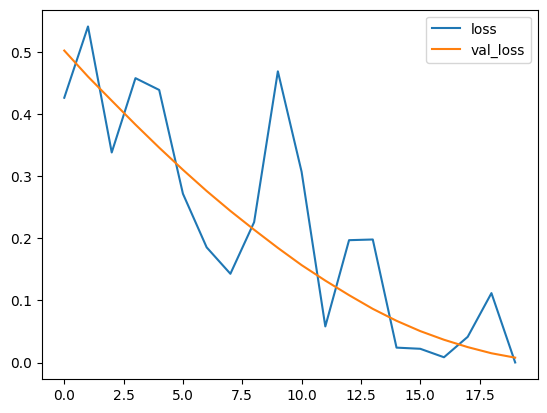

In [ ]:
lstm_losses = pd.DataFrame(model.history.history)
lstm_losses.plot()

In [ ]:
lstm_test_predictions =[]
first_eval_batch = scaled_train[-length:]
curr_batch = first_eval_batch=first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
  current_pred = model.predict(curr_batch)[0]
  lstm_test_predictions.append(current_pred)
  curr_batch = np.append(curr_batch[:,1:,:], [[current_pred]], axis = 1)

1/1 [==============================] - 0s 25ms/step


<Axes: >

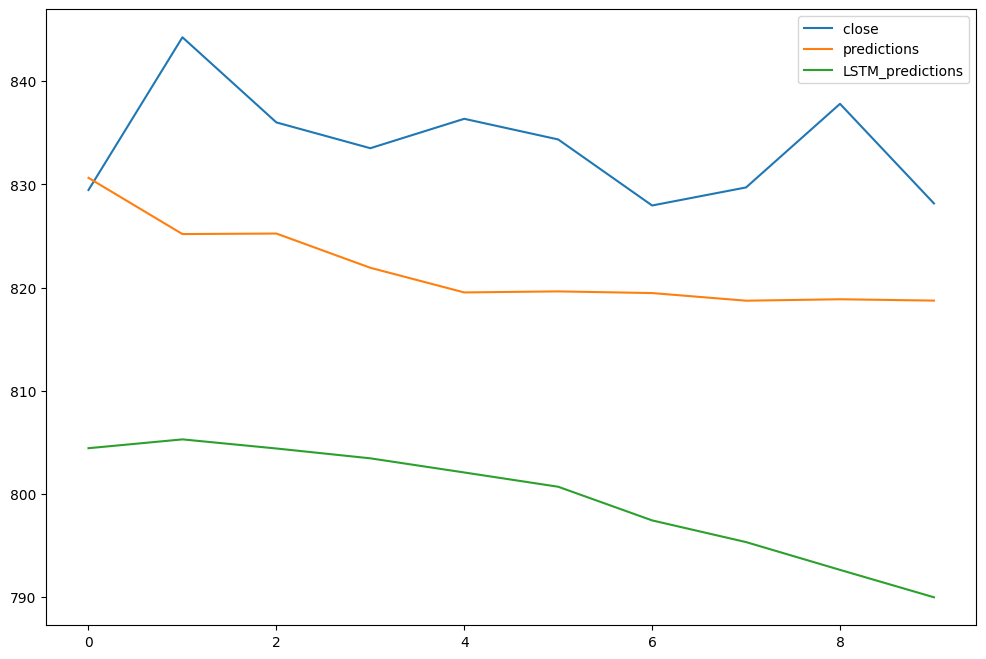

In [ ]:
lstm_true_prediction = scaler.inverse_transform(lstm_test_predictions)
test['LSTM_predictions'] = lstm_true_prediction
test.plot(figsize = (12, 8))

In [ ]:
forecast =[]
first_eval_batch = scaled_train[-length:]
curr_batch =first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
  current_pred = model.predict(curr_batch)[0]
  forecast.append(current_pred)
  curr_batch = np.append(curr_batch[:,1:,:], [[current_pred]], axis = 1)

forecast  = scaler.inverse_transform(forecast)

1/1 [==============================] - 0s 23ms/step


<Axes: >

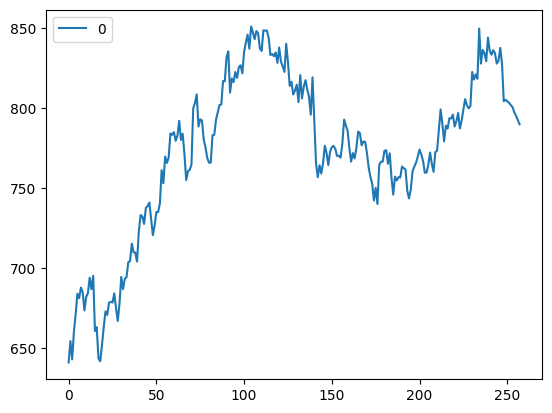

In [ ]:
full_data = pd.DataFrame(np.concatenate((df_array.flatten(), forecast.flatten())))
full_data.plot()